<a href="https://colab.research.google.com/github/HVManiSree/Linear-Regression-ML/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1

Model Accuracy on Test Data: 0.90


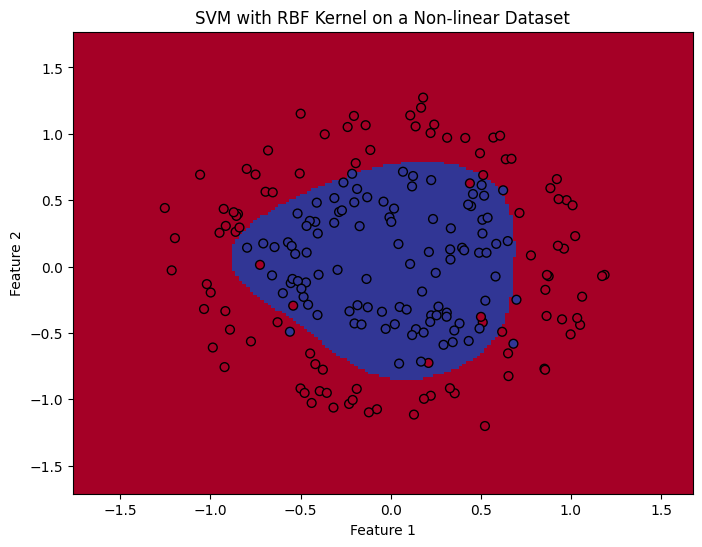

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=200, factor=0.5, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_classifier = SVC(kernel='rbf', C=10, gamma='scale')
svm_classifier.fit(X_train, y_train)

accuracy = svm_classifier.score(X_test, y_test)
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

def plot_decision_boundary(X, y, classifier, title):
    # Set the color map
    cmap_light = plt.cm.RdYlBu
    cmap_bold = plt.cm.RdYlBu

    # Create a mesh grid to plot the decision boundary
    h = .02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point in the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X, y, svm_classifier, "SVM with RBF Kernel on a Non-linear Dataset")

QUESTION 2

In [2]:
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [3]:
emails = [
    "Hello, how are you today?",
    "Get a free iPhone now! Click here.",
    "Meeting rescheduled for tomorrow.",
    "You have won a lottery. Claim your prize!",
    "Re: Project status update",
    "URGENT: Your account has been compromised. Verify now."
]
labels = [0, 1, 0, 1, 0, 1]

X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.3, random_state=42)

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC(kernel='linear', C=1.0, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

new_email = ["Congratulations! You've been selected for a prize."]
prediction = pipeline.predict(new_email)

if prediction[0] == 1:
    print(f"\n'{new_email[0]}' is classified as: Spam")
else:
    print(f"\n'{new_email[0]}' is classified as: Not Spam")

Model Accuracy: 0.50

Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.00      0.00      0.00         1
        Spam       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


'Congratulations! You've been selected for a prize.' is classified as: Spam


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
